<a href="https://colab.research.google.com/github/otwn/ComputerVision-ML-DL-Review/blob/master/sklearn/Module5_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 1.4MB/s 


In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/scikit-learn-mooc-master")

In [ ]:
os.listdir()

['README.md',
 '.github',
 'python_scripts',
 'requirements.txt',
 '.binder',
 '.circleci',
 'notebooks',
 'plan.md',
 'jupyter-book',
 'figures',
 'local-install-instructions.md',
 'requirements-dev.txt',
 'slides',
 'build_tools',
 'LICENSE',
 '.gitignore',
 'index.md',
 'Makefile',
 'environment.yml',
 'environment-dev.yml',
 '.jupyter',
 'CONTRIBUTING.md',
 'datasets',
 'check_env.py']

# Build a classification decision tree

In [ ]:
import pandas as pd 

penguins = pd.read_csv("./datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"


In [ ]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)

range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_function(fitted_classifier, range_features, ax=None):
  """Plot the boundary of the decision function of a classifier."""
  from sklearn.preprocessing import LabelEncoder
  feature_names = list(range_features.keys())
  # create a grid to evaluate all possible samples
  plot_step = 0.02
  xx, yy = np.meshgrid(
      np.arange(*range_features[feature_names[0]], plot_step),
      np.arange(*range_features[feature_names[1]], plot_step),
  )

  # compute the associated prediction
  Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = LabelEncoder().fit_transform(Z)
  Z = Z.reshape(xx.shape)

  # make the plot of the boundary and the data samples
  if ax is None:
    _, ax = plt.subplots()
  
  ax.contourf(xx, yy, Z, alpha=0.4, cmpa="RdBu")
  return ax
  

In [ ]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)


LogisticRegression()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'cmpa'


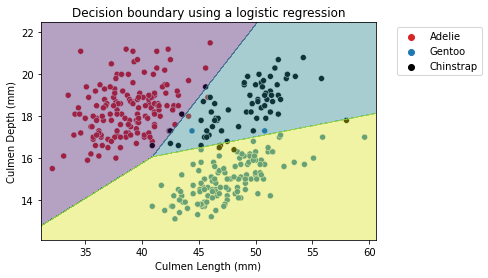

In [ ]:
import seaborn as sns

# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(linear_model, range_features, ax=ax);

# put hte legend outside the plot
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left");
_ = plt.title("Decision boundary using a logistic regression");

In [ ]:
linear_model.fit(data_train, target_train)
test_score = linear_model.score(data_test, target_test)
print(f"Accuracy of the LogisitcRegression: {test_score:.2f}")

Accuracy of the LogisitcRegression: 0.98


Unlike linear models, decision trees are non-parametric models: they are not controlled by a mathematical decision function and do not have weights or intercept to be optimized.

Indeed, decision trees will partition the space by considering a single feature at a time. Let's illustrate this behaviour by having a decision tree make a single split to partition the feature space.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'cmpa'


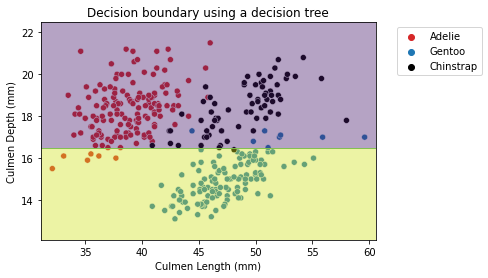

In [ ]:
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a decision tree")

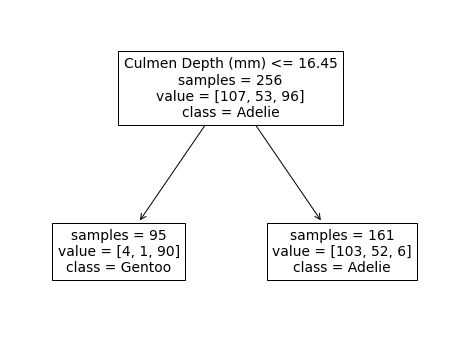

In [ ]:
from sklearn.tree import plot_tree 

_, ax = plt.subplots(figsize=(8,6))
_ = plot_tree(tree, feature_names=culmen_columns, class_names=tree.classes_,
              impurity=False, ax=ax)

We see that the split was done the culmen depth feature. The original
dataset was subdivided into 2 sets based on the culmen depth
(inferior or superior to 16.45 mm).

This partition of the dataset minimizes the class diversities in each
sub-partitions. This measure is also known as a **criterion**,
and is a settable parameter.

If we look more closely at the partition, we see that the sample superior to
16.45 belongs mainly to the Adelie class. Looking at the values, we indeed
observe 103 Adelie individuals in this space. We also count 52 Chinstrap
samples and 6 Gentoo samples. We can make similar interpretation for the
partition defined by a threshold inferior to 16.45mm. In this case, the most
represented class is the Gentoo species.

Let's see how our tree would work as a predictor. Let's start to see the
class predicted when the culmen depth is inferior to the threshold.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">We are using the function <tt class="docutils literal">fig, ax = <span class="pre">plt.subplots(figsize=(8,</span> 6))</tt> to create
a figure and an axis with a specific size. Then, we can pass the axis to the
<tt class="docutils literal">sklearn.tree.plot_tree</tt> function such that the drawing happens in this axis.</p>
</div>

In [ ]:
tree.predict([ [0, 15] ])

array(['Gentoo'], dtype=object)

In [ ]:
tree.predict([ [0, 17]])

array(['Adelie'], dtype=object)

In [ ]:
y_pred_proba = tree.predict_proba([[0,17]])
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)

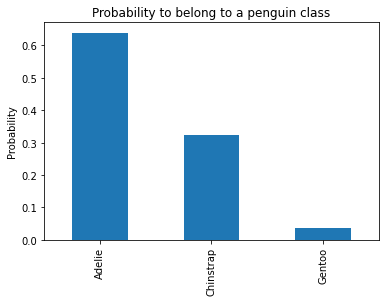

In [ ]:
y_proba_class_0.plot.bar()
plt.ylabel("Probability")
_ = plt.title("Probability to belong to a penguin class")

In [ ]:
adelie_proba = 103/161
chinstrap_proba = 52/161
gentoo_proba = 6/161
print(f"Probabilities for the different classes:\n"
      f"Adelie: {adelie_proba:.3f}\n"
      f"Chinstrap: {chinstrap_proba:.3f}\n"
      f"Gentoo: {gentoo_proba:.3f}\n")

Probabilities for the different classes:
Adelie: 0.640
Chinstrap: 0.323
Gentoo: 0.037



It is also important to note that the culmen length has been disregarded for the moment. It means that whatever the value given, it will not be used during the prediction.

In [ ]:
tree.predict_proba([[10000,17]])

array([[0.63975155, 0.32298137, 0.03726708]])

In [ ]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.78


# Exercise M5.01

In [ ]:
import pandas as pd

penguins = pd.read_csv("./datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [ ]:
from sklearn.model_selection import train_test_split 

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)

range_features = {
    feature_name: (data[feature_name].min()-1, data[feature_name].max()+1)
    for feature_name in data.columns
}

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def plot_decision_function(fitted_classifier, range_features, ax=None):
  """Plot the boundary of the decision function of a classifier."""
  from sklearn.preprocessing import LabelEncoder 
  feature_names = list(range_features.keys())
  # create a grid to evaluate all possible samples
  plot_step = 0.02
  xx, yy = np.meshgrid(
      np.arange(*range_features[feature_names[0]], plot_step),
      np.arange(*range_features[feature_names[1]], plot_step),
  )

  # computer the associated prediction
  Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = LabelEncoder().fit_transform(Z)
  Z = Z.reshape(xx.shape)

  # make the plot of the boundary and the data samples
  if ax is None:
    _, ax = plt.subplots()
  ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
  return ax

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

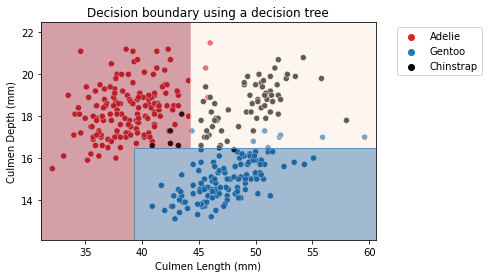

In [ ]:
import seaborn as sns
palette = ["tab:red", "tab:blue", "black"]
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
_ = plt.title("Decision boundary using a decision tree")

# Decision tree for regression

In [ ]:
import pandas as pd 

penguins = pd.read_csv("./datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]

In [ ]:
import numpy as np 
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)

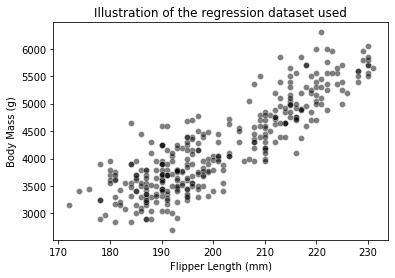

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

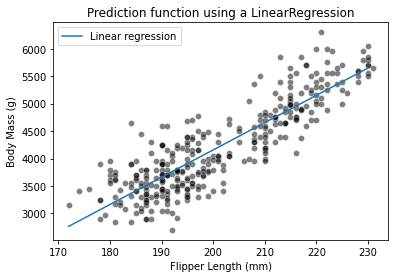

In [ ]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

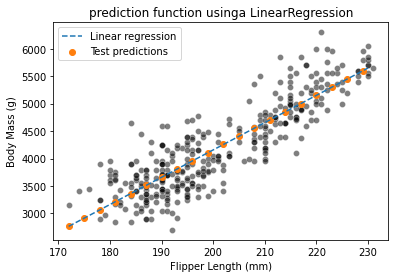

In [ ]:
ax = sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                     color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression", linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Test predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("prediction function usinga LinearRegression")

Contrary to linear models, decision trees are non-parametric models:
they do not make assumptions about the way data is distributed.
This will affect the prediction scheme. Repeating the above experiment
will highlight the differences.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

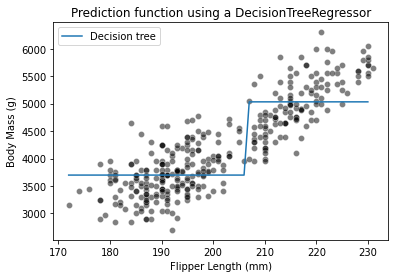

In [ ]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

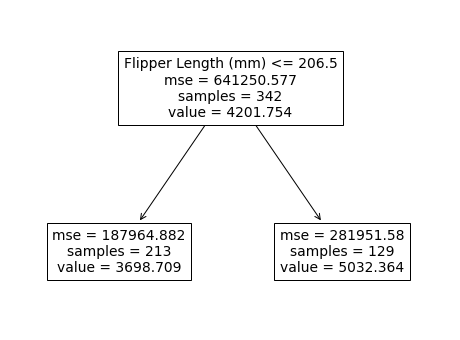

In [ ]:
from sklearn.tree import plot_tree 

_, ax = plt.subplots(figsize=(8,6))
_ = plot_tree(tree, feature_names=data_columns, ax=ax)

In [ ]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

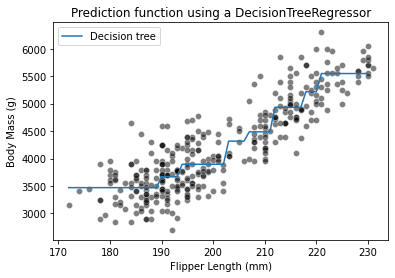

In [ ]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

# Exercise M5.02

In [ ]:
import pandas as pd 
penguins = pd.read_csv("./datasets/penguins_regression.csv")
data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]


First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the flipper length of the training dataset. Get the predictions of each model using this test dataset.

In [ ]:
import numpy as np 
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min(),
                                   data_train[data_columns[0]].max()),
                         columns=data_columns)
target_predicted_linear = linear_model.predict(data_test)
target_predicted_tree = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the predictions of both model on the top.

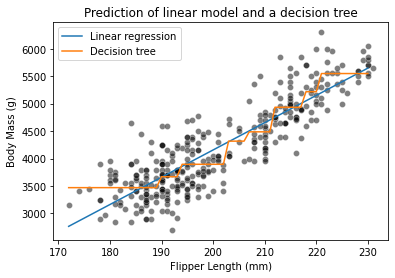

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted_linear, label="Linear regression")
plt.plot(data_test, target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

Now, we will check the extrapolation capabilities of each model. Create a dataset containing the value of your previous dataset. Besides, add values below and above the minimum and the maximum of the flipper length seen during training.



In [ ]:
offset = 30
data_test = pd.DataFrame(np.arange(data_train[data_columns[0]].min() - offset,
                                   data_train[data_columns[0]].max() + offset),
                         columns=data_columns)

Finally, make predictions with both models on this new testing set. Repeat the plotting of the previous exercise.

In [ ]:
target_predicted_linear = linear_model.predict(data_test)
target_predicted_tree = tree.predict(data_test)

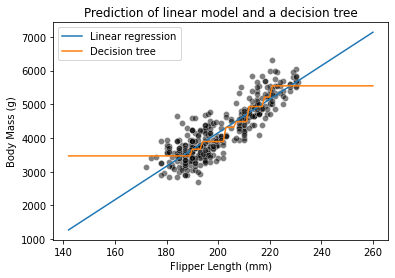

In [ ]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, target_predicted_linear,
         label="Linear regression")
plt.plot(data_test, target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

# Importance of decision tree hyperparameters on generalization

In [ ]:
import pandas as pd 
data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("./datasets/penguins_classification.csv")

In [ ]:
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Culmen Length (mm)  342 non-null    float64
 1   Culmen Depth (mm)   342 non-null    float64
 2   Species             342 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.1+ KB


In [ ]:
data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("./datasets/penguins_regression.csv")

In [ ]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Flipper Length (mm)  342 non-null    float64
 1   Body Mass (g)        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [ ]:
data_reg.isnull().sum()

Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

we will create two functiosn that will
- fit a decision tree on some training data;
- show the decision function of the model

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

def plot_classification(model, X, y, ax=None):
  from sklearn.preprocessing import LabelEncoder 
  model.fit(X, y)

  range_features = {
      feature_name: (X[feature_name].min()-1, X[feature_name].max()+1)
      for feature_name in X.columns
  }
  feature_names = list(range_features.keys())

  # create a grid to evaluate all possible samples
  plot_step = 0.02
  xx, yy = np.meshgrid(
      np.arange(*range_features[feature_names[0]], plot_step),
      np.arange(*range_features[feature_names[1]], plot_step),
  )

  # compute the associated prediction
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = LabelEncoder().fit_transform(Z)
  Z = Z.reshape(xx.shape)

  # make the plot of the boundary and the data samples
  if ax is None:
    _, ax = plt.subplots()
  ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
  if y.nunique() == 3:
    palette = ["tab:red", "tab:blue", "black"]
  else:
    palette = ["tab:red", "tab:blue"]
  sns.scatterplot(
      x=data_clf_columns[0], y=data_clf_columns[1],
      hue=target_clf_column, data=data_clf, ax=ax, palette=palette
  )
  return ax

In [ ]:
def plot_regression(model, X, y, ax=None):
  model.fit(X, y)
  X_test = pd.DataFrame(
      np.arange(X.iloc[:,0].min(), X.iloc[:, 0].max()),
      columns=X.columns
  )
  y_pred = model.predict(X_test)

  if ax is None:
    _, ax = plt.subplots()
  sns.scatterplot(x=X.iloc[:,0], y=y, color="black", alpha=0.5, ax=ax)
  ax.plot(X_test, y_pred, linewidth=4)

  return ax

The hyperparameter max_depth controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree. Let's build a shallow tree and then a deeper tree, for both classification and regression, to understand the impact of the parameter.

We can first set the max_depth parameter value to a very low value.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth = max_depth)
tree_reg = DecisionTreeRegressor(max_depth = max_depth)

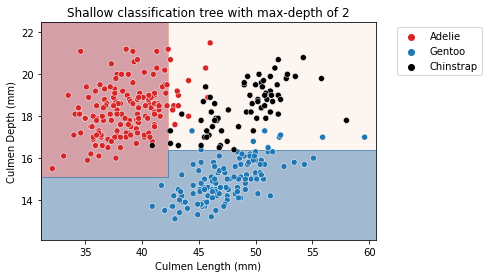

In [ ]:
plot_classification(tree_clf, data_clf[data_clf_columns], data_clf[target_clf_column])
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

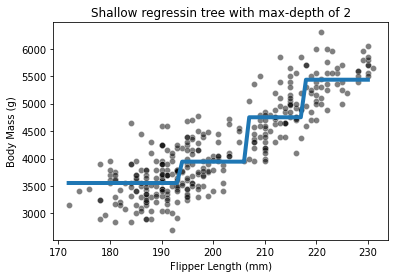

In [ ]:
plot_regression(tree_reg, data_reg[data_reg_columns], data_reg[target_reg_column])
_ = plt.title(f"Shallow regressin tree with max-depth of {max_depth}")

In [ ]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

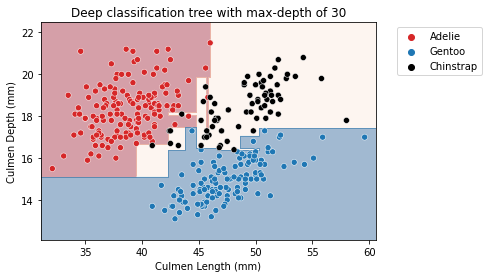

In [ ]:
plot_classification(tree_clf, data_clf[data_clf_columns], data_clf[target_clf_column])
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

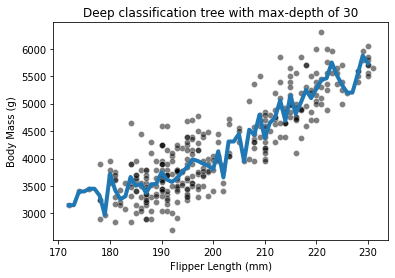

In [ ]:
plot_regression(tree_reg, data_reg[data_reg_columns], data_reg[target_reg_column])
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

The max_depth is one of the hyperparameters that one should optimize via cross-validation and grid-search.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

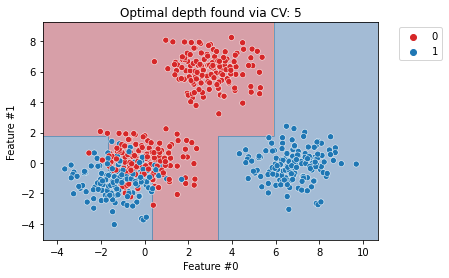

In [ ]:
plot_classification(tree_clf, data_clf[data_clf_columns], data_clf[target_clf_column])
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_clf.best_params_['max_depth']}")

In [ ]:
tree_reg

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

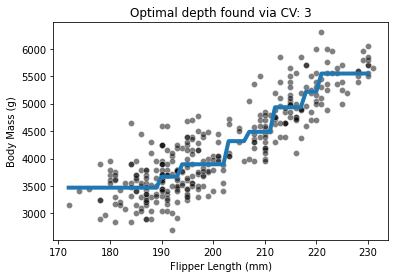

In [ ]:
plot_regression(tree_reg, data_reg[data_reg_columns], data_reg[target_reg_column])
_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_reg.best_params_['max_depth']}")

The max_depth hyperparameter controls the overall complexity of the tree. This parameter is adequate under the assumption that a tree is built is symmetric. However, there is not guarantee that a tree will be symmetric. Indeed, optimal statistical performance could be reached by growing some of the branches deeper than some others.



In [ ]:
from sklearn.datasets import make_blobs 

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# blobs that will be interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0,0], [-1,-1]], random_state=0
)
# blobs that will be easily separated
X_2, y_2 = make_blobs(
    n_samples=300, centers=[[3,6], [7,0]], random_state=0
)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])

data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column]
)
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

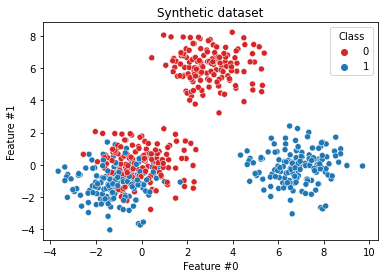

In [ ]:
sns.scatterplot(data=data_clf, x=data_clf_columns[0], y=data_clf_columns[1],
                hue=target_clf_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Synthetic dataset")

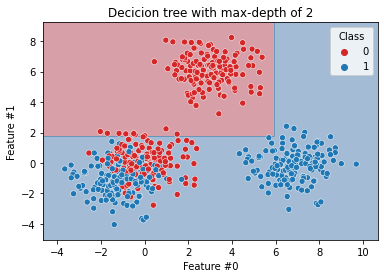

In [ ]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
plot_classification(tree_clf, data_clf[data_clf_columns], data_clf[target_clf_column])
_ = plt.title(f"Decicion tree with max-depth of {max_depth}")

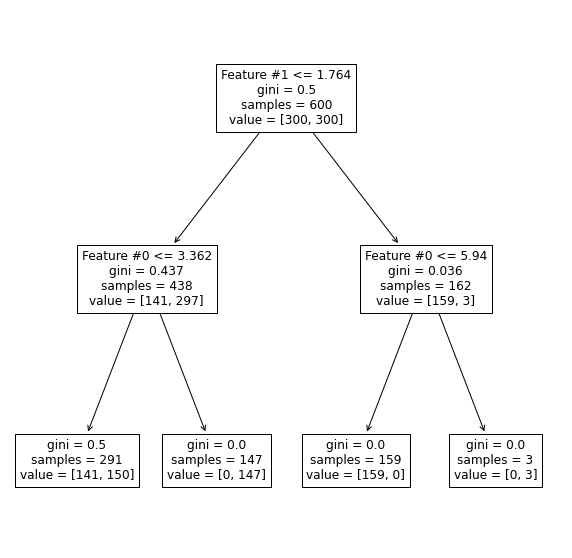

In [ ]:
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(10,10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

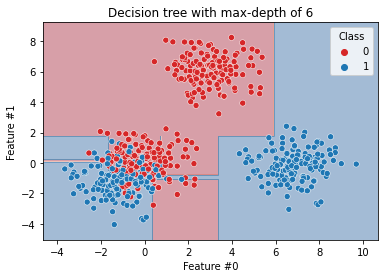

In [ ]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
plot_classification(tree_clf, data_clf[data_clf_columns], data_clf[target_clf_column])
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

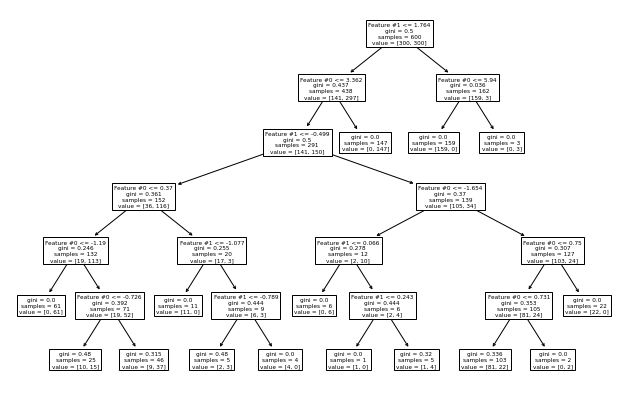

In [ ]:
_, ax = plt.subplots(figsize=(11,7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

As expected, the left branch of the tree continue to grow while no further
splits were done on the right branch. Fixing the `max_depth` parameter would
cut the tree horizontally at a specific level, whether or not it would
be more beneficial that a branch continue growing.

The hyperparameters `min_samples_leaf`, `min_samples_split`,
`max_leaf_nodes`, or `min_impurity_decrease` allows growing asymmetric trees
and apply a constraint at the leaves or nodes level. We will check the effect
of `min_samples_leaf`.

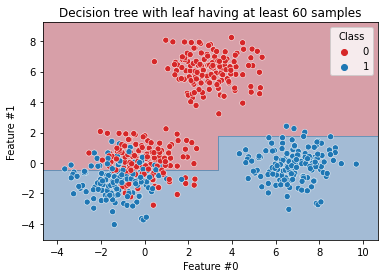

In [ ]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
plot_classification(tree_clf, data_clf[data_clf_columns], data_clf[target_clf_column])
_ = plt.title(f"Decision tree with leaf having at least {min_samples_leaf} samples")

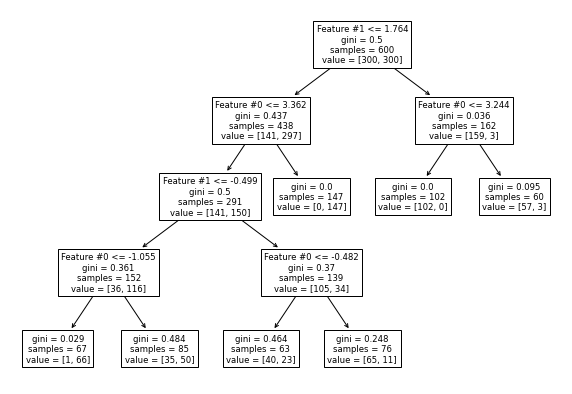

In [ ]:
_, ax = plt.subplots(figsize=(10, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

# Wrap-up quiz 5

In [ ]:
import pandas as pd 
ames_housing = pd.read_csv("./datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [ ]:
from sklearn.compose import make_column_selector as selector
numerical_columns = selector(dtype_exclude=object)(data)
numerical_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [ ]:
data_numerical.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

linear_model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),   
    LinearRegression()
)
tree_model = make_pipeline(
    SimpleImputer(),
    DecisionTreeRegressor(random_state=0)
)

cv_linear = cross_validate(linear_model, data_numerical, target, cv=10, return_estimator=True, n_jobs=2)
cv_tree = cross_validate(tree_model, data_numerical, target, cv=10, n_jobs=2)

In [ ]:
cv_linear["test_score"].mean()

0.7191360030629823

In [ ]:
cv_tree["test_score"].mean()

0.6224784392065366

In [ ]:
tree_model.get_params()

{'decisiontreeregressor': DecisionTreeRegressor(random_state=0),
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'mse',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_impurity_split': None,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 0,
 'decisiontreeregressor__splitter': 'best',
 'memory': None,
 'simpleimputer': SimpleImputer(),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'mean',
 'simpleimputer__verbose': 0,
 'steps': [('simpleimputer', SimpleImputer()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {"decisiontreeregressor__max_depth": np.arange(1, 15)}
tree_grid = GridSearchCV(tree_model, param_grid=param_grid, cv=10)

In [ ]:
tree_grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=0))]),
             param_grid={'decisiontreeregressor__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
cv_tree2 = cross_validate(tree_grid, data_numerical, target, cv=10, return_estimator=True, n_jobs=2)

In [ ]:
cv_tree2["test_score"].mean()

0.6976647456891891

In [ ]:
tree_grid.fit(data_numerical, target)
tree_grid.best_params_

{'decisiontreeregressor__max_depth': 6}

In [ ]:
for fold_idx, estimator in enumerate(cv_tree2["estimator"]):
  print(f"Best parameter found on fold#{fold_idx+1}")
  print(f"{estimator.best_params_}")

Best parameter found on fold#1
{'decisiontreeregressor__max_depth': 7}
Best parameter found on fold#2
{'decisiontreeregressor__max_depth': 8}
Best parameter found on fold#3
{'decisiontreeregressor__max_depth': 4}
Best parameter found on fold#4
{'decisiontreeregressor__max_depth': 8}
Best parameter found on fold#5
{'decisiontreeregressor__max_depth': 6}
Best parameter found on fold#6
{'decisiontreeregressor__max_depth': 5}
Best parameter found on fold#7
{'decisiontreeregressor__max_depth': 6}
Best parameter found on fold#8
{'decisiontreeregressor__max_depth': 5}
Best parameter found on fold#9
{'decisiontreeregressor__max_depth': 7}
Best parameter found on fold#10
{'decisiontreeregressor__max_depth': 6}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


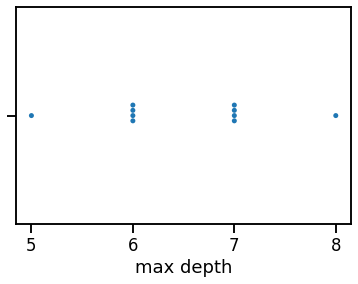

In [ ]:
import seaborn as sns
sns.set_context("talk")

max_depth = [
    estimator.best_params_["decisiontreeregressor__max_depth"]
    for estimator in cv_tree2["estimator"]
]
max_depth = pd.Series(max_depth, name="max depth")
sns.swarmplot(max_depth)

## question 4

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer

numerical_columns = selector(dtype_exclude=object)(data)
numerical_processor = SimpleImputer()
categorical_columns = selector(dtype_include=object)(data)
categorical_processor = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                      OrdinalEncoder(handle_unknown="use_encoded_value",
                                                     unknown_value=-1))

preprocessor = make_column_transformer(
    (categorical_processor, categorical_columns),
    (numerical_processor, numerical_columns),
)
tree_model4 = make_pipeline(
    preprocessor,
    DecisionTreeRegressor(random_state=0)
)

cv_tree4 = cross_validate(tree_model4, data, target, cv=10, n_jobs=2)

In [ ]:
cv_tree4["test_score"].mean()

0.7422751120581628